In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../../csv_data/use/dataset3_2.csv', thousands=",",encoding='UTF-8')
df = df[['회사명','거래소코드','회계년도','총자본영업이익율','자기자본순이익율','유동자산회전율','총자본투자효율','매출채권회전율','총자본회전율',
         '유형자산회전율','매출액총이익율','순운전자본비율','재고자산_대_유동자산비율','총자산증가율','유동비율', '기계장비율','자기자본증가율',
         'R & D 투자효율', '경상개발비율',
         '매출원가감소율여부','배당금감소율여부','변화율여부','직원감소율여부','자본증가율여부',
         '투자활동감소율여부', '기업수명주기','회생기업2']] # 3년 연속 피쳐들

# df = df[['회사명','거래소코드','회계년도','종업원1인당부가가치', '순운전자본비율', '자기자본순이익율', '총자본투자효율', 
#          '기계장비율', '유동비율', '총자본영업이익율', '유동자산회전율', '유형자산회전율', '매출액총이익율',
#         '매출원가감소율여부','배당금감소율여부','변화율여부','직원감소율여부','자본증가율여부','투자활동감소율여부',
#         '기업수명주기','회생기업2']] # 전체 피쳐들
# df['회계년도'] = pd.to_datetime(df['회계년도'], format='%d-%b').dt.strftime('20%d%m')
# df['거래소코드'] = df['거래소코드'].astype(str).str.zfill(6)
df['회생기업2'] = df['회생기업2'].fillna(0)
df['거래소코드'] = df['거래소코드'].astype(int)
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
df['회계년도'] = df['회계년도'].astype(int)
df

,회사명,거래소코드,회계년도,총자본영업이익율,자기자본순이익율,유동자산회전율,총자본투자효율,매출채권회전율,총자본회전율,유형자산회전율,...,R & D 투자효율,경상개발비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,회생기업2
0,(주)케이이씨,92220,201112,-5.42,-22.34,1.50,14.34,3.46,0.62,1.07,...,2.67,0.000000,0,0,0,0,0,0,1,0.0
1,(주)엠에스오토텍,123040,201112,7.17,1.65,1.73,17.32,3.49,0.75,1.37,...,0.00,0.000000,0,0,0,0,0,1,2,0.0
2,한올바이오파마(주),9420,201112,-8.70,-27.45,1.19,14.52,2.64,0.76,8.38,...,8.62,0.047455,0,0,0,0,0,0,4,0.0
3,(주)세원물산,24830,201112,0.00,6.93,0.71,0.00,3.82,0.39,1.64,...,0.00,0.000000,0,0,0,0,0,0,2,0.0
4,피에스텍(주),2230,201112,3.13,11.18,1.13,14.46,8.84,0.45,10.21,...,0.00,0.000000,0,0,0,0,0,0,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,(주)투비소프트,79970,201912,-11.26,-39.97,0.89,10.48,2.46,0.42,15.68,...,6.32,0.000000,0,0,0,0,0,0,4,0.0
2657,(주)아이디스,143160,201912,1.97,1.26,0.89,21.55,4.55,0.67,7.50,...,6.12,0.000000,0,0,0,0,0,1,3,1.0
2658,(주)와이지플러스,37270,201912,0.79,-3.74,1.93,15.25,11.92,0.82,15.18,...,0.00,0.000000,0,0,0,0,0,0,3,1.0
2659,(주)육일씨엔에쓰,191410,201912,-9.28,-19.34,1.67,7.85,5.97,0.62,1.16,...,0.94,0.000000,0,0,0,0,0,0,1,0.0


In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfx = df[['유동비율', '기계장비율', '자기자본증가율', '경상개발비율']]

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(dfx,i)for i in range(dfx.shape[1])]
vif['features'] = dfx.columns

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,1.060739,유동비율
1,1.041202,기계장비율
2,1.026831,자기자본증가율
3,1.011865,경상개발비율


In [258]:
dfy = pd.get_dummies(df['기업수명주기'])
dfy.columns = ['기업1', '기업2', '기업3', '기업4', '기업5']
dfy

,기업1,기업2,기업3,기업4,기업5
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
2656,0,0,0,1,0
2657,0,0,1,0,0
2658,0,0,1,0,0
2659,1,0,0,0,0


In [269]:
dfv = pd.concat([df, dfy], axis=1)

for i in range(0, len(dfv)):
    if dfv.loc[i, '기업수명주기'] == 1 or dfv.loc[i, '기업수명주기'] == 2:
        dfv.loc[i, '기업6'] = 0

    elif dfv.loc[i, '기업수명주기'] == 3 or dfv.loc[i, '기업수명주기'] == 4 or dfv.loc[i, '기업수명주기'] == 5:
        dfv.loc[i, '기업6'] = 1

In [270]:
import statsmodels.formula.api as smf
from tensorboard import summary
formula = '회생기업2 ~ C(기업6)'
log_reg = smf.logit(formula, data = dfv).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.447577
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 2661
Model:                          Logit   Df Residuals:                     2659
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                0.001920
Time:                        12:39:36   Log-Likelihood:                -1191.0
converged:                       True   LL-Null:                       -1193.3
Covariance Type:            nonrobust   LLR p-value:                   0.03230
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.7295      0.075    -23.099      0.000      -1.876      -1.583
C(기업6)[T.1.0]     0.2235      0.104      2.139      0.032       0.019       0.428
=================================================================================
"""

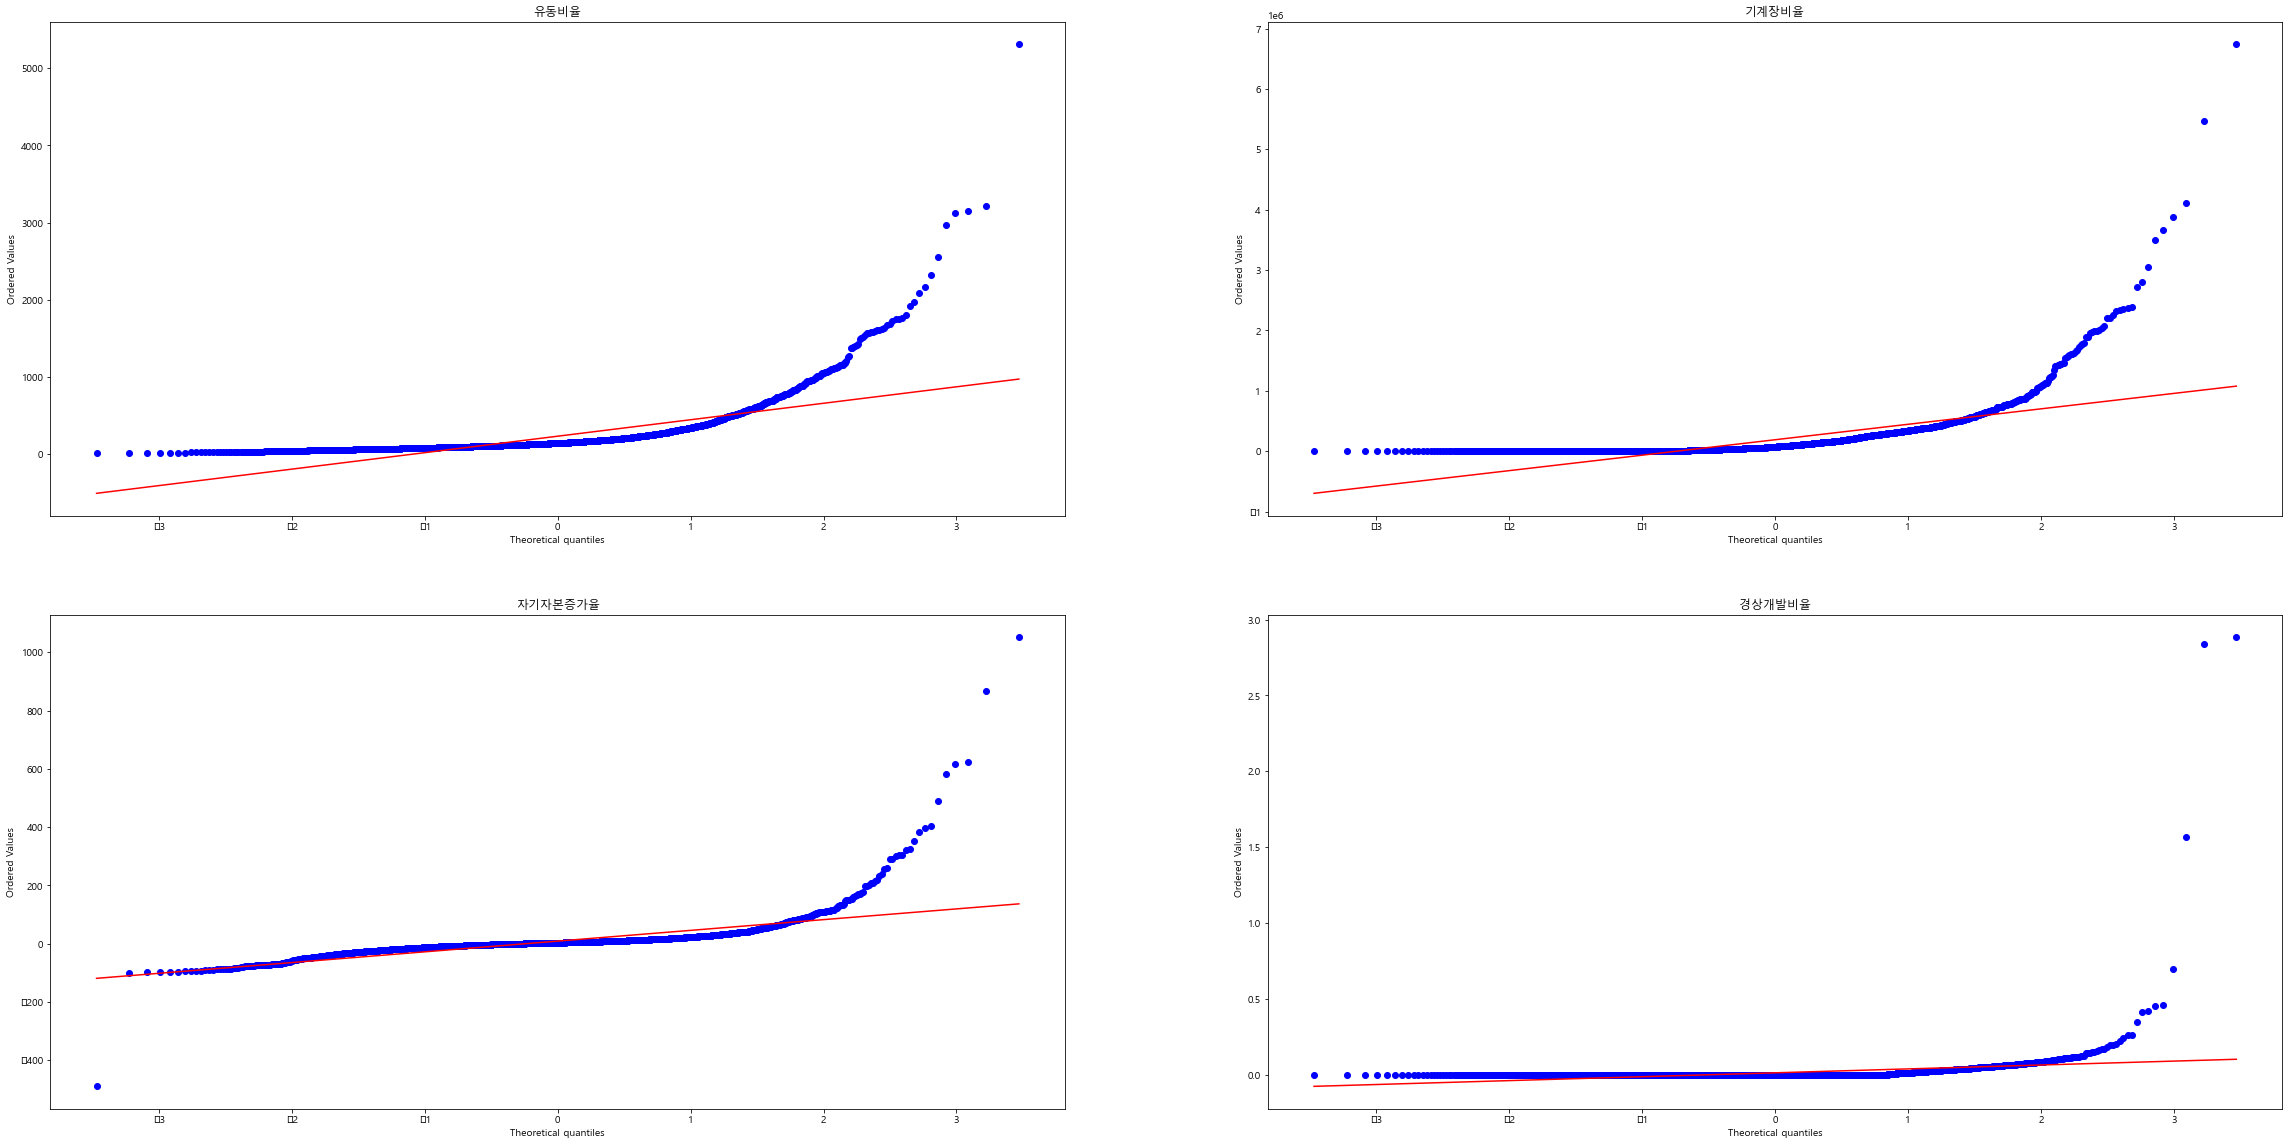

In [199]:
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(2,2)
fig.set_size_inches((40,20))

stats.probplot(df['유동비율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("유동비율")
stats.probplot(df['기계장비율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("기계장비율")
stats.probplot(df['자기자본증가율'],dist=stats.norm,plot=axes[1,0])
axes[1,0].title.set_text("자기자본증가율")
stats.probplot(df['경상개발비율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("경상개발비율")

In [200]:
from scipy.stats.mstats import winsorize
df1 = dfx
for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.025)

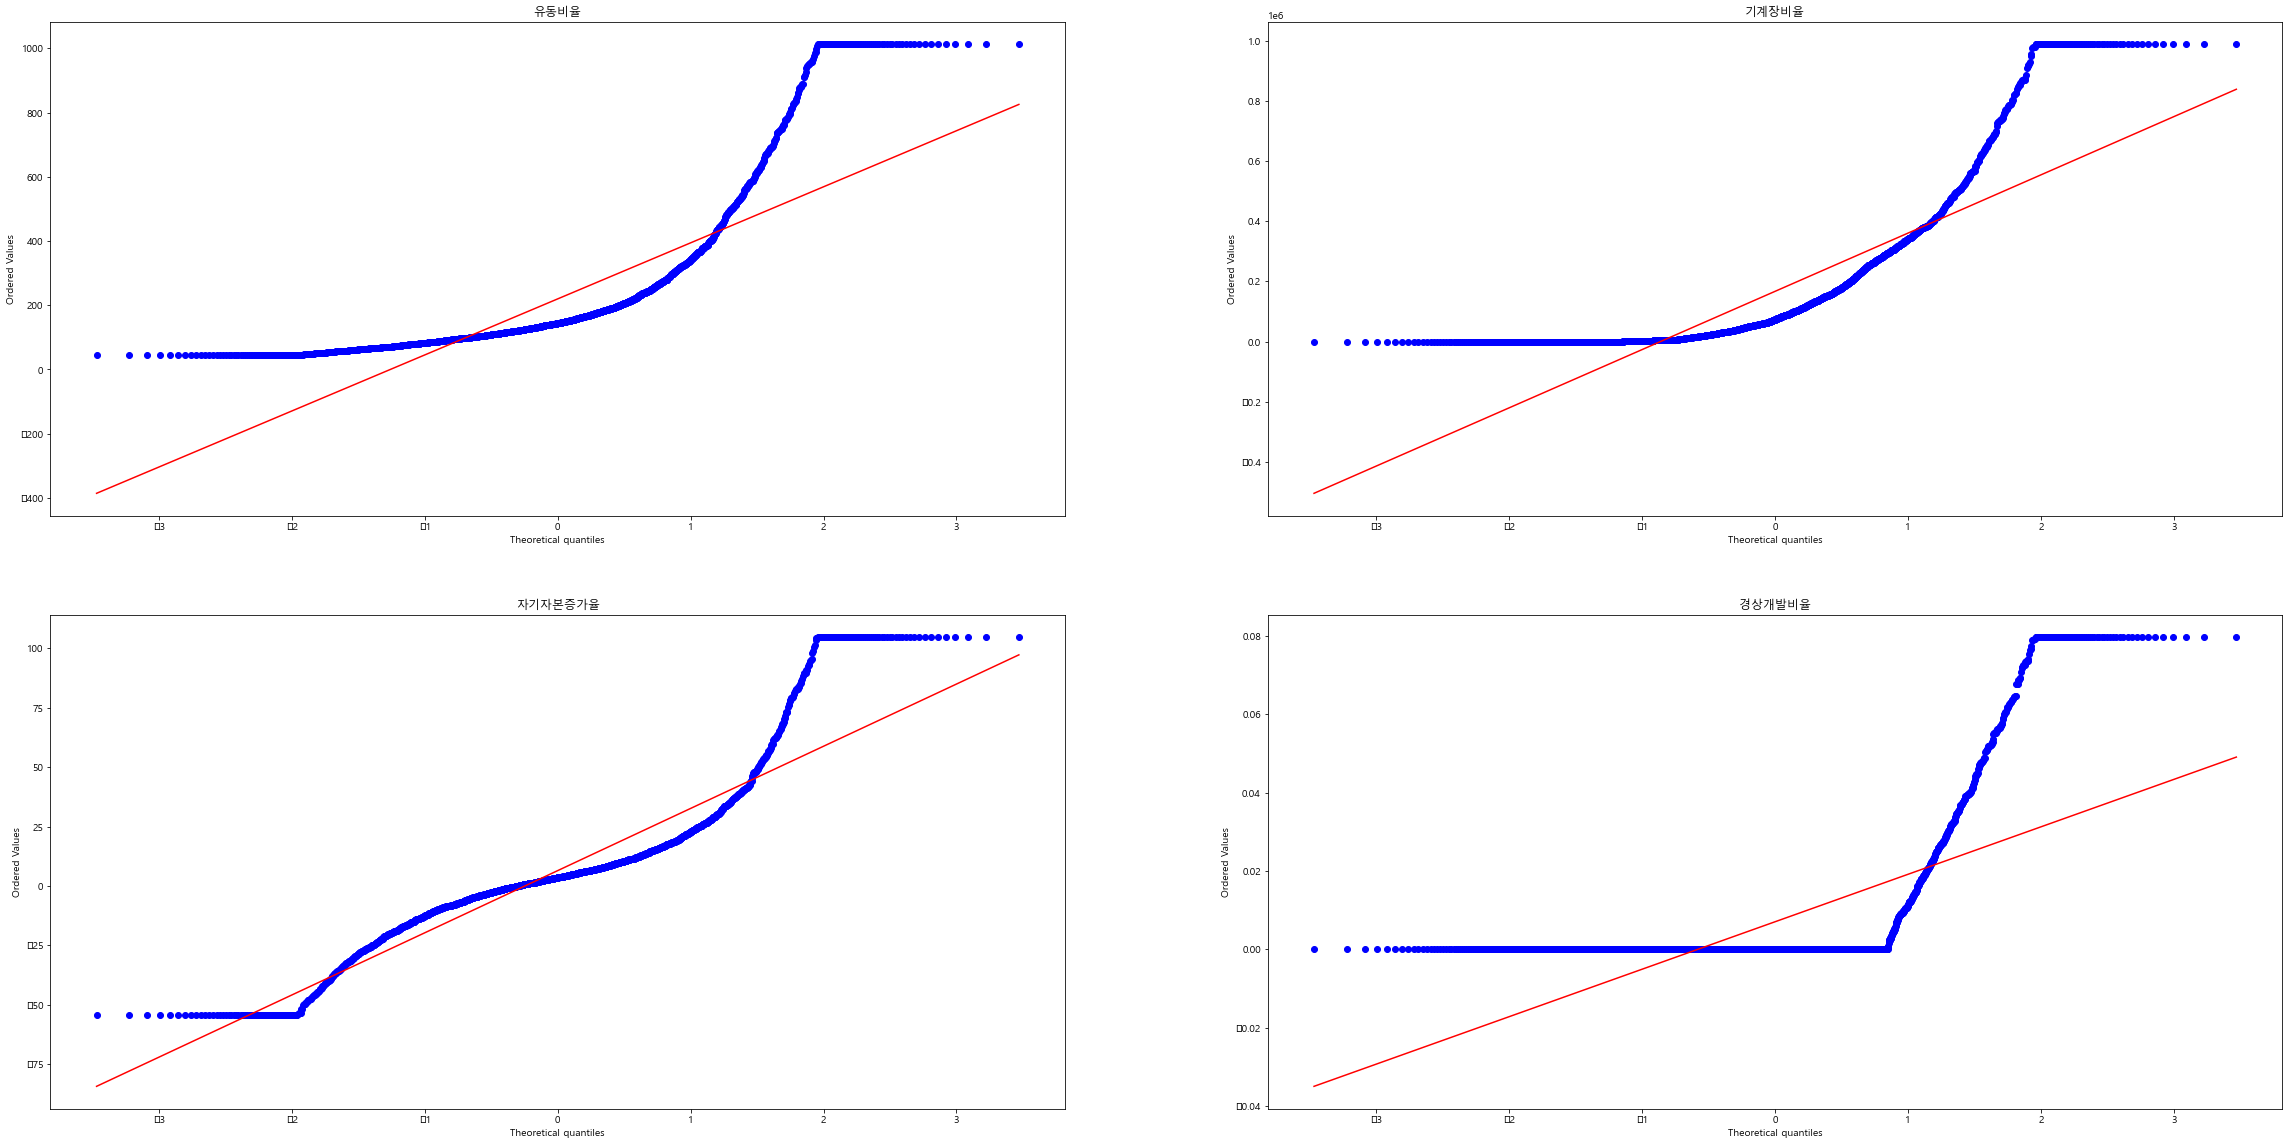

In [201]:
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(2,2)
fig.set_size_inches((40,20))

stats.probplot(df1['유동비율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("유동비율")
stats.probplot(df1['기계장비율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("기계장비율")
stats.probplot(df1['자기자본증가율'],dist=stats.norm,plot=axes[1,0])
axes[1,0].title.set_text("자기자본증가율")
stats.probplot(df1['경상개발비율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("경상개발비율")

### 피쳐와 레이블 나누기

In [202]:
data = df.iloc[:,1:26]
target = df['회생기업2']

### 스케일링을 위해 데이터를 나눠줍니다

In [203]:
# 기간을 얼마나 나누게 될까요~?
x_train = df.loc[:1686] # 2011 ~ 2016년
x_test = df.loc[1686:] # 2017 ~ 2019년
y_train = target.loc[:1686] # 2011 ~ 2016년
y_test = target.loc[1686:] # 2017 ~ 2019년

In [204]:
df_feature = x_train.iloc[:,3:19] # 스케일링을 사용할 데이터
df_front = x_train.iloc[:,1:3] # 거래소코드와 회계년도는 스케일링은 하면 안되니 따로 뺀다
df_semi = x_train.iloc[:,19:26] # 반정형 역시 따로 뺀다
df_semi_test = x_test.iloc[:, 19:26]

### 데이터 분리

In [205]:
# 기간을 나누기전에 스케일링 부터 합시당!
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
ss_sc = SS.fit_transform(df_feature)
ss_sc2 = pd.DataFrame(ss_sc)
ss_sc2.columns=['총자본영업이익율', '자기자본순이익율', '유동자산회전율', '총자본투자효율',
       '매출채권회전율', '총자본회전율', '유형자산회전율', '매출액총이익율', '순운전자본비율', '재고자산_대_유동자산비율',
       '총자산증가율', '유동비율', '기계장비율', '자기자본증가율', 'R & D 투자효율', '경상개발비율']
# ss_sc2.columns=['종업원1인당부가가치', '순운전자본비율', '자기자본순이익율', '총자본투자효율',
#        '기계장비율', '유동비율', '총자본영업이익율', '유동자산회전율', '유형자산회전율', '매출액총이익율']
ss_sc2 = ss_sc2[['유동비율', '기계장비율', '자기자본증가율', '경상개발비율']]
#ss_sc2 = pd.concat([df_front,ss_sc2],axis=1)
ss_sc2 = pd.concat([ss_sc2,df_semi],axis=1)

In [206]:
x_train = x_train[['유동비율', '기계장비율', '자기자본증가율', '경상개발비율']]
x_train = pd.concat([x_train,df_semi],axis=1)

In [207]:
x_test = x_test[['유동비율', '기계장비율', '자기자본증가율', '경상개발비율']]
x_test = pd.concat([x_test,df_semi_test],axis=1)

In [208]:
#ss_sc2.drop(columns=['거래소코드', '회계년도'], inplace=True)

#### 기본데이터 분포

In [209]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(ss_sc2.shape, x_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(1687, 11), 테스트 세트 Shape:(975, 11)
 학습 세트 레이블 값 분포 비율
0.0    0.895673
1.0    0.104327
Name: 회생기업2, dtype: float64

 테스트 세트 레이블 값 분포 비율
0.0    0.420865
1.0    0.157084
Name: 회생기업2, dtype: float64


### 오버샘플링을 해봅시다

#### RandomOverSampler
- Random Over Sampling은 소수 클래스의 데이터를 반복해서 넣는 것(replacement)이다. 가중치를 증가시키는 것과 비슷하다.

In [210]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_train_ros,y_train_ros = ros.fit_resample(ss_sc2,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ros.shape, y_train_ros.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_ros).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1687, 11) (1687,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (3022, 11) (3022,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    1511
1.0    1511
Name: 회생기업2, dtype: int64


#### ADASYN
- ADASYN(Adaptive Synthetic Sampling) 방법은 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

In [211]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()
x_train_ada,y_train_ada = ada.fit_resample(ss_sc2,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ada.shape, y_train_ada.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_ada).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1687, 11) (1687,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (2998, 11) (2998,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    1511
1.0    1487
Name: 회생기업2, dtype: int64


#### SMOTE
- SMOTE(Synthetic Minority Over-sampling Technique) 방법도 ADASYN 방법처럼 데이터를 생성하지만 생성된 데이터를 무조건 소수 클래스라고 하지 않고 분류 모형에 따라 분류한다.

In [212]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(ss_sc2,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1687, 11) (1687,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (3022, 11) (3022,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    1511
1.0    1511
Name: 회생기업2, dtype: int64


### 언더샘플링을 해봅시다

#### 랜덤 언더 샘플링
- 무작위로 데이터를 없애는 단순 샘플링

In [213]:
from imblearn.under_sampling import RandomUnderSampler

undo = RandomUnderSampler()
x_train_under, y_train_under = undo.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_under.shape, y_train_under.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_under).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (1687, 11) (1687,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (352, 11) (352,)
Under Sampling 적용 후 레이블 값 분포: 
 0.0    176
1.0    176
Name: 회생기업2, dtype: int64


#### 토멕링크 샘플링
- 토멕링크(Tomek’s link)란 서로 다른 클래스에 속하는 한 쌍의 데이터 (x+,x−)로 서로에게 더 가까운 다른 데이터가 존재하지 않는 것이다. 즉 클래스가 다른 두 데이터가 아주 가까이 붙어있으면 토멕링크가 된다. 토멕링크 방법은 이러한 토멕링크를 찾은 다음 그 중에서 다수 클래스에 속하는 데이터를 제외하는 방법으로 경계선을 다수 클래스쪽으로 밀어붙이는 효과가 있다.

In [214]:
from imblearn.under_sampling import TomekLinks

tome = TomekLinks()
x_train_tome, y_train_tome = tome.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_tome.shape, y_train_tome.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_tome).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (1687, 11) (1687,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (1602, 11) (1602,)
Under Sampling 적용 후 레이블 값 분포: 
 0.0    1426
1.0     176
Name: 회생기업2, dtype: int64


#### Condensed Nearest Neighbour
- CNN(Condensed Nearest Neighbour) 방법은 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법이다. 선텍된 데이터 집합을 S라고 하자.
- 소수 클래스 데이터를 모두 S에 포함시킨다.
- 다수 데이터 중에서 하나를 골라서 가장 가까운 데이터가 다수 클래스이면 포함시키지 않고 아니면 S에 포함시킨다.
- 더이상 선택되는 데이터가 없을 때까지 2를 반복한다.
- 이 방법을 사용하면 기존에 선택된 데이터와 가까이 있으면서 같은 클래스인 데이터는 선택되지 않기 때문에 다수 데이터의 경우 선택되는 비율이 적어진다.

In [215]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour()
x_train_cnn, y_train_cnn = cnn.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_cnn.shape, y_train_cnn.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_cnn).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (1687, 11) (1687,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (605, 11) (605,)
Under Sampling 적용 후 레이블 값 분포: 
 0.0    429
1.0    176
Name: 회생기업2, dtype: int64


#### One Sided Selection
- One Sided Selection은 토맥링크 방법과 Condensed Nearest Neighbour 방법을 섞은 것이다. 토맥링크 중 다수 클래스를 제외하고 나머지 데이터 중에서도 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외한다.

In [216]:
from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection()
x_train_oss, y_train_oss = oss.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_oss.shape, y_train_oss.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_oss).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (1687, 11) (1687,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (1598, 11) (1598,)
Under Sampling 적용 후 레이블 값 분포: 
 0.0    1422
1.0     176
Name: 회생기업2, dtype: int64


#### Edited Nearest Neighbours
- ENN(Edited Nearest Neighbours) 방법은 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 모두(kind_sel="all") 또는 다수(kind_sel="mode") 다수 클래스가 아니면 삭제하는 방법이다. 소수 클래스 주변의 다수 클래스 데이터는 사라진다.

In [217]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours()
x_train_enn, y_train_enn = enn.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_enn.shape, y_train_enn.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_enn).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (1687, 11) (1687,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (1294, 11) (1294,)
Under Sampling 적용 후 레이블 값 분포: 
 0.0    1118
1.0     176
Name: 회생기업2, dtype: int64


#### Neighbourhood Cleaning Rule
- Neighbourhood Cleaning Rule 방법은 CNN(Condensed Nearest Neighbour) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [218]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule()
x_train_ncr, y_train_ncr = ncr.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ncr.shape, y_train_ncr.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_ncr).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (1687, 11) (1687,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (1307, 11) (1307,)
Under Sampling 적용 후 레이블 값 분포: 
 0.0    1131
1.0     176
Name: 회생기업2, dtype: int64


### 복합 샘플링

#### SMOTE + ENN
- SMOTE+ENN 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [219]:
from imblearn.combine import SMOTEENN

smen = SMOTEENN()
x_train_smen, y_train_smen = smen.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_smen.shape, y_train_smen.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_smen).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (1687, 11) (1687,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (2098, 11) (2098,)
Under Sampling 적용 후 레이블 값 분포: 
 1.0    1188
0.0     910
Name: 회생기업2, dtype: int64


#### SMOTE+Tomek
- SMOTE+Tomek 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 토멕링크 방법을 섞은 것이다.

In [220]:
from imblearn.combine import SMOTETomek

smtk = SMOTETomek()
x_train_smtk, y_train_smtk = smtk.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_smtk.shape, y_train_smtk.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_smtk).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (1687, 11) (1687,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (2930, 11) (2930,)
Under Sampling 적용 후 레이블 값 분포: 
 0.0    1465
1.0    1465
Name: 회생기업2, dtype: int64


- 랜덤포레스트만 over가 좋고 나머지는 under가 좋음

### 로지스틱 회귀분석

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit 

lg = LogisticRegression()
param_grid = [{'C':np.linspace(0.1,10,100)}]
gs = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='f1',cv=TimeSeriesSplit(n_splits=6),n_jobs=1)
gs.fit(x_train, y_train)
best_est = gs.best_estimator_
predictions = best_est.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print('GridSearchCV 최적 하이퍼 파라미터 :', gs.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(gs.best_score_))
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'C': 0.1}
GridSearchCV 최고 정확도 :nan
테스트 세트에서의 LogisticRegression 정확도 : 0.7282


In [222]:
lg1 = LogisticRegression(C=0.1)
lg1.fit(x_train, y_train)
# best_est = lg1.best_estimator_
predictions = best_est.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
# print('GridSearchCV 최적 하이퍼 파라미터 :', lg1.best_params_)
# print('GridSearchCV 최고 정확도 :{0:.4f}'.format(lg1.best_score_))
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))

테스트 세트에서의 LogisticRegression 정확도 : 0.7282


In [223]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}'.format(accuracy, precision, recall,f1))

get_clf_eval(y_test, predictions)

오차 행렬
[[710   0]
 [265   0]]
정확도: 0.7282, 정밀도: 0.0000, 재현율: 0.0000, f1: 0.0000


In [224]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       710
         1.0       0.00      0.00      0.00       265

    accuracy                           0.73       975
   macro avg       0.36      0.50      0.42       975
weighted avg       0.53      0.73      0.61       975



<function matplotlib.pyplot.show(close=None, block=None)>

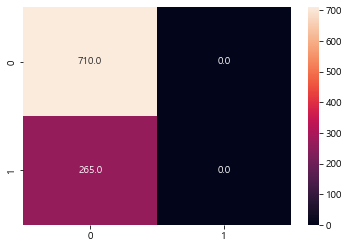

In [225]:
import seaborn as sns

cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

### 랜덤 포레스트

In [226]:
# 랜덤포레스트 + 그리드서치로 모델 학습
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
param_grid_rf = [{'n_estimators': range(5,50,100), 'max_depth': range(3,5), 'max_features': range(1,4)}]
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='f1', cv=TimeSeriesSplit(n_splits=6), n_jobs=1)
rf_gs.fit(x_train, y_train)
best_est = rf_gs.best_estimator_
predictions_rf = best_est.predict(x_test)
accuracy = accuracy_score(y_test, predictions_rf)
print('GridSearchCV 최적 하이퍼 파라미터 :', rf_gs.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(rf_gs.best_score_))
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))
get_clf_eval(y_test, predictions_rf)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'max_features': 1, 'n_estimators': 5}
GridSearchCV 최고 정확도 :0.0000
테스트 세트에서의 LogisticRegression 정확도 : 0.7282
오차 행렬
[[710   0]
 [265   0]]
정확도: 0.7282, 정밀도: 0.0000, 재현율: 0.0000, f1: 0.0000


In [227]:
from sklearn.ensemble import RandomForestClassifier

#xgb_wrapper = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5,colsmple_pytree=0.8)
rf_clf = RandomForestClassifier(max_depth=4, n_estimators=5,max_features= 2, random_state=11)
rf_clf.fit(x_train, y_train)
w_preds = rf_clf.predict(x_test)

get_clf_eval(y_test, w_preds)

오차 행렬
[[710   0]
 [265   0]]
정확도: 0.7282, 정밀도: 0.0000, 재현율: 0.0000, f1: 0.0000


In [228]:
from sklearn.metrics import classification_report

print(classification_report(y_test,w_preds))

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       710
         1.0       0.00      0.00      0.00       265

    accuracy                           0.73       975
   macro avg       0.36      0.50      0.42       975
weighted avg       0.53      0.73      0.61       975



<function matplotlib.pyplot.show(close=None, block=None)>

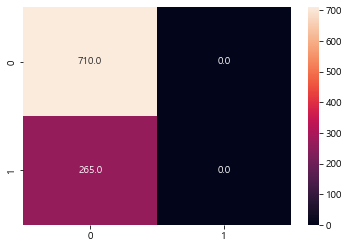

In [229]:
import seaborn as sns

cm = confusion_matrix(y_test,predictions_rf)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

### XGBoost

In [230]:
#필요한 라이브러리 임포트
from xgboost import XGBClassifier

#XGBoost 정의
#파라미터는 이전 글을 참고하여 grid 설정(dict 형태)
xgb= XGBClassifier()

xgb_param_grid={
    'learning_rate' : [0.01,0.02,0.03,0.04,0.05],
    'max_depth' : [3,5,7,10,15],
    'colsample_bytree' : [0.5,0.6,0.7,0.8,0.9],
    'eta' : [0,0.1,0.3,0.5,0.7,0.9,1],
    'num_boost_around' : [5,10,15,20,25,30],
    'alpha' : [0,0.1,0.2,0.3,0.4,1],
    'scale_pos_weight' : [0, 1, 2, 3, 4]
    
}

#score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
#여기서 설정 파라미터의 갯수(총 4000개의 조합이므로 4000번의 학습이 돌아감)
# xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1", n_jobs=-1, verbose = 2,cv=TimeSeriesSplit(n_splits=6))
# xgb_grid.fit(ss_sc2,y_train)

# #best f1_macro 수치와 best parameter확인
# print("best f1 : {0: .4f}".format(xgb_grid.best_score_))
# print("best param : ",xgb_grid.best_params_)

# #dataframe으로 랭킹순보기
# result_df = pd.DataFrame(xgb_grid.cv_results_)
# result_df.sort_values(by=['rank_test_score'],inplace=True)

# #plot
# result_df[['params','mean_test_score','rank_test_score']].head(10)

In [233]:
import xgboost as xgb
from xgboost import XGBClassifier

#xgb_wrapper = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5,colsmple_pytree=0.8)
xgb_wrapper = XGBClassifier(learning_rate= 10, scale_pos_weight=5, n_estimators=100)
xgb_wrapper.fit(x_train, y_train)
w_preds = xgb_wrapper.predict(x_test)

get_clf_eval(y_test, w_preds)

오차 행렬
[[604 106]
 [203  62]]
정확도: 0.6831, 정밀도: 0.3690, 재현율: 0.2340, f1: 0.2864


In [234]:
from sklearn.metrics import classification_report

print(classification_report(y_test,w_preds))

              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80       710
         1.0       0.37      0.23      0.29       265

    accuracy                           0.68       975
   macro avg       0.56      0.54      0.54       975
weighted avg       0.65      0.68      0.66       975



<function matplotlib.pyplot.show(close=None, block=None)>

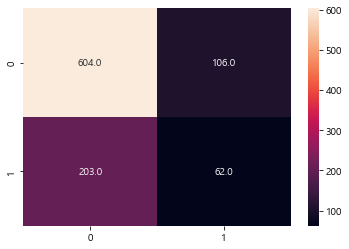

In [235]:
import seaborn as sns

cm = confusion_matrix(y_test,w_preds)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

### LGBM

In [236]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
start = time.time()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,0,0,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}#Define the scoring

# lgb_clf=GridSearchCV(lgb,parameters,scoring='balanced_accuracy',cv=TimeSeriesSplit(n_splits=6))
# lgb_clf.fit(ss_sc2,y_train)

# print(lgb_clf.best_params_)
# predicted_lgb = lgb_clf.predict(x_test)
# print('Classification of the result is:')
# print(accuracy_score(y_test, predicted_lgb))

# end = time.time()
# print('Execution time is:')
# print(end - start)

In [237]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
start = time.time()

#lgb_cr = LGBMClassifier(learning_rate=0.1, max_depth=1,min_child_samples=15,num_leaves=31,reg_alpha=0.01, feature_fraction=0.9)
lgb_cr = LGBMClassifier(learning_rate=0.1, min_child_samples=5, num_leaves=40, reg_alpha=0)
lgb_cr.fit(x_train, y_train)
w_preds_lgb = lgb_cr.predict(x_test)
# w_pred_proba = lgb_cr.predict(x_test[['거래소코드', '회계년도', '기계장비율', 'R & D 투자효율', '경상개발비율', '매출원가감소율여부',
#        '배당금감소율여부', '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부', '기업수명주기']])

get_clf_eval(y_test, w_preds_lgb)

오차 행렬
[[701   9]
 [236  29]]
정확도: 0.7487, 정밀도: 0.7632, 재현율: 0.1094, f1: 0.1914


In [238]:
from sklearn.metrics import classification_report

print(classification_report(y_test,w_preds_lgb))

              precision    recall  f1-score   support

         0.0       0.75      0.99      0.85       710
         1.0       0.76      0.11      0.19       265

    accuracy                           0.75       975
   macro avg       0.76      0.55      0.52       975
weighted avg       0.75      0.75      0.67       975



<function matplotlib.pyplot.show(close=None, block=None)>

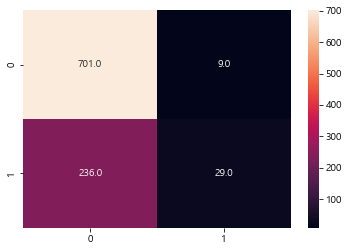

In [239]:
import seaborn as sns

cm = confusion_matrix(y_test,w_preds_lgb)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

In [240]:
# from sklearn.svm import SVR,SVC

# svm = SVC()
# # param_grid = {'kernel':['rbf'], 'C':[1,100,10,0.1,0.01,0.001]}
# param_grid = [ 
#   {'kernel':['linear'], 'C':[1,100,10,0.1,0.01,0.001]}, #특정 하이퍼 파라메타 조합 피하기
#   {'kernel':['poly','rbf'], 'C':[1,100,10,0.1,0.01,0.001], 'gamma':['auto','scale',1000,100,10,1,0.1,0.01,0.001,0.0001]}]

# # svm_gird = GridSearchCV(svm,param_grid= param_grid)
# svm_gird = GridSearchCV(svm,param_grid= param_grid,cv=TimeSeriesSplit(n_splits=5),scoring=2)
# svm_gird.fit(X_train_over,y_train_over)
# estimator = svm_gird.best_estimator_
# svm_pred = svm_gird.predict(x_test)

# get_clf_eval(y_test, svm_pred)

### 그냥 GBM

In [241]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=11)
gb_clf.fit(x_train, y_train) # 학습하기
gb_pred = gb_clf.predict(x_test) # 예측하기
gb_accuracy = accuracy_score(y_test, gb_pred) # 정확도 확인

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.7303


In [242]:
# GBM 성능검증
get_clf_eval(y_test, gb_pred)
print(classification_report(y_test,gb_pred))

오차 행렬
[[706   4]
 [259   6]]
정확도: 0.7303, 정밀도: 0.6000, 재현율: 0.0226, f1: 0.0436
              precision    recall  f1-score   support

         0.0       0.73      0.99      0.84       710
         1.0       0.60      0.02      0.04       265

    accuracy                           0.73       975
   macro avg       0.67      0.51      0.44       975
weighted avg       0.70      0.73      0.63       975



<function matplotlib.pyplot.show(close=None, block=None)>

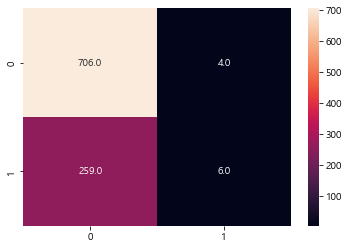

In [243]:
import seaborn as sns

cm = confusion_matrix(y_test,gb_pred)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

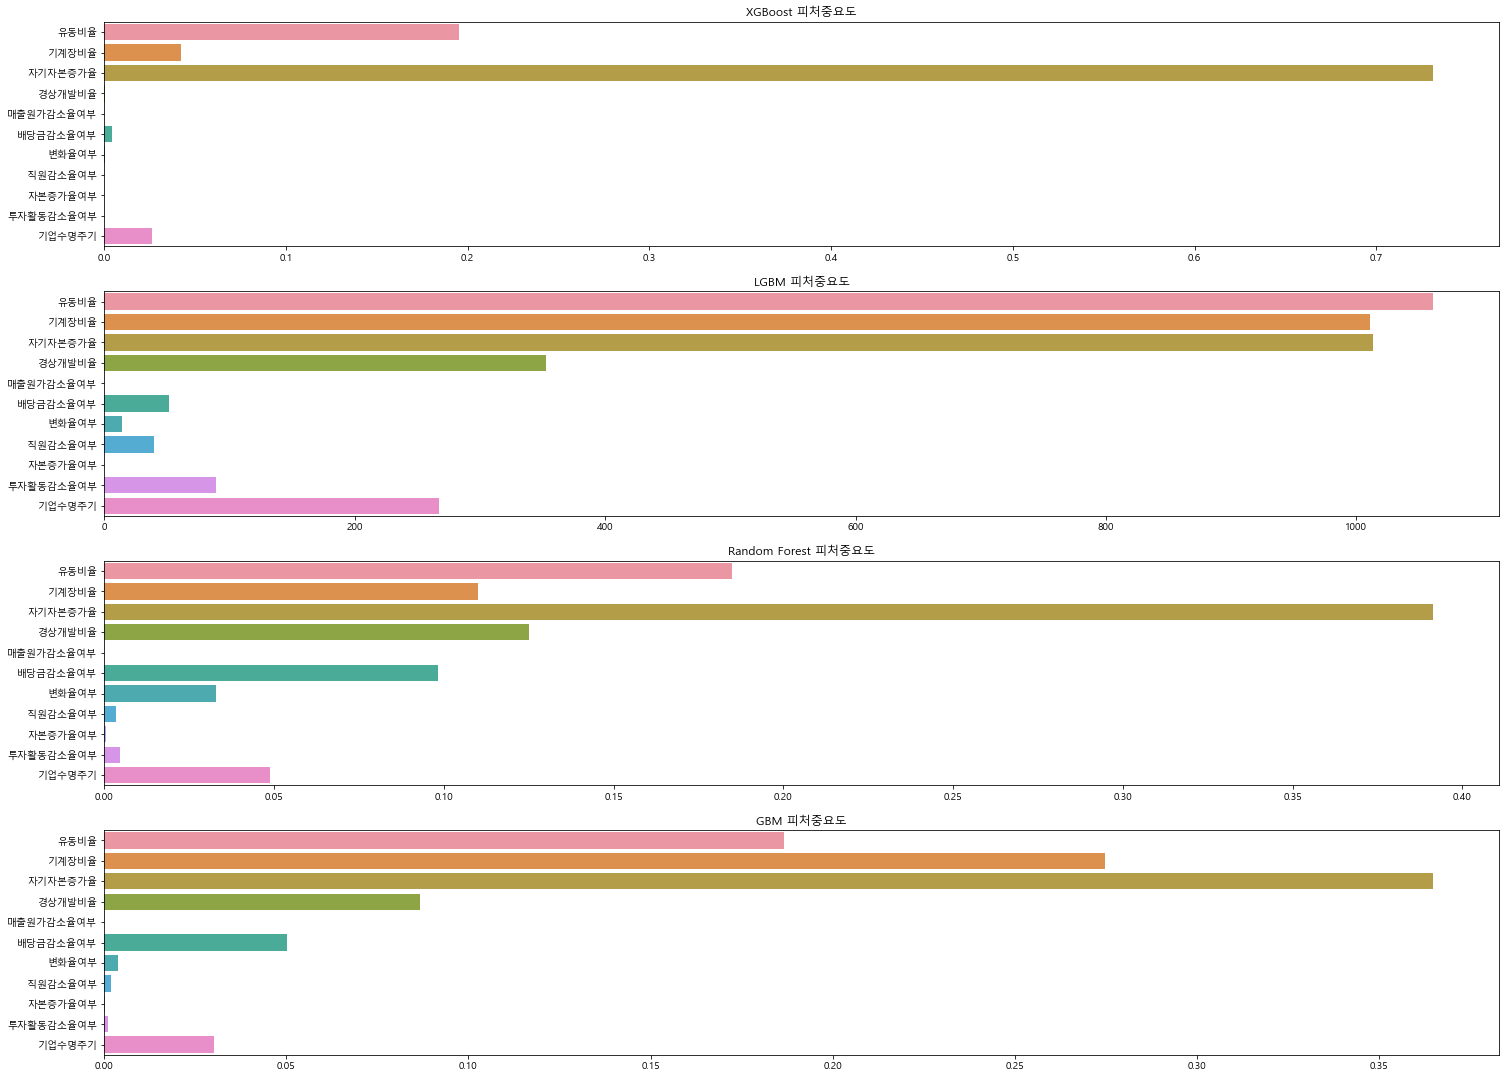

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(4, 1, squeeze=False)
fig.set_size_inches((25,19))

plt.title("피처중요도")
sns.barplot(x=xgb_wrapper.feature_importances_, y=ss_sc2.columns, ax=axes[0,0])
axes[0,0].title.set_text("XGBoost 피처중요도")
sns.barplot(x=lgb_cr.feature_importances_, y=ss_sc2.columns, ax=axes[1,0])
axes[1,0].title.set_text("LGBM 피처중요도")
sns.barplot(x=rf_clf.feature_importances_, y=ss_sc2.columns, ax=axes[2,0])
axes[2,0].title.set_text("Random Forest 피처중요도")
sns.barplot(x=gb_clf.feature_importances_, y=ss_sc2.columns, ax=axes[3,0])
axes[3,0].title.set_text("GBM 피처중요도")

plt.show()

### 스태킹 앙상블

In [245]:
# stacking = np.array([predictions, predictions_rf, w_preds])
# stacking.shape

In [246]:
# stacking = np.transpose(stacking)
# stacking.shape

In [247]:
# stacking[:10]

In [248]:
# lgb_cr.fit(stacking, y_test)
# lgb_pred = lgb_cr.predict(stacking)
# get_clf_eval(y_test, lgb_pred)

In [249]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_absolute_error

# # 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
# def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
#     # 지정된 n_folds값으로 KFold 생성.
#     kf = TimeSeriesSplit(n_splits=n_folds)
#     #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
#     train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
#     test_pred = np.zeros((X_test_n.shape[0],n_folds))
#     print(model.__class__.__name__ , ' model 시작 ')
    
#     for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
#         #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
#         print('\t 폴드 세트: ',folder_counter,' 시작 ')
#         X_tr = X_train_n[train_index] 
#         y_tr = y_train_n[train_index] 
#         X_te = X_train_n[valid_index]  
        
#         #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
#         model.fit(X_tr , y_tr)       
#         #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
#         train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
#         #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
#         test_pred[:, folder_counter] = model.predict(X_test_n)
            
#     # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
#     test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
#     #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
#     return train_fold_pred , test_pred_mean

In [250]:
# # CV스태킹 알고리즘 각 모델에 적용
# lg_train, lg_test = get_stacking_base_datasets(gs, x_train_ada, y_train_ada, x_test, 5)
# rf_train, rf_test = get_stacking_base_datasets(rf_gs, x_train_ada, y_train_ada, x_test, 5)
# dt_train, dt_test = get_stacking_base_datasets(xgb_grid, x_train_ada, y_train_ada, x_test,  5)    
# # ada_train, ada_test = get_stacking_base_datasets(ada_clf, x_train_ada, y_train_ada, x_test, 5)

# # CV스태킹 알고리즘 결과로 메타 모델 학습/시험에 필요한 result_a result_b 만들기 
# Stack_final_X_train = np.concatenate((lg_train, rf_train, dt_train),axis=1)
# Stack_final_X_test = np.concatenate((lg_test, rf_test, dt_test), axis=1)

# # 메타 모델 학습
# lgb_clf.fit(Stack_final_X_train, y_train)
# stack_final = lgb_clf.predict(Stack_final_X_test)

# print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))